# 1. Install Dependencies and Setup

In [246]:
!python --version

Python 3.11.5


In [247]:
!pip install tensorflow opencv-python matplotlib

  Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl (38.1 MB)



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [248]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs     


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [249]:
import tensorflow as tf
import os

In [250]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [251]:
tf.config.list_physical_devices('GPU')

[]

In [252]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


# 2. Remove dodgy images

In [253]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [254]:
data_dir = 'data'

In [255]:
os.listdir(data_dir)

['Coffee_Cups', 'Newspapers']

In [256]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [257]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [258]:
img2 = cv2.imread(os.path.join('data','Cartons','27adco.190.jpg'))
img2.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

# 3. Load Data

In [259]:
import numpy as np
from matplotlib import pyplot as plt

In [260]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 32 files belonging to 2 classes.


In [261]:
data_iterator = data.as_numpy_iterator()

In [262]:
data_iterator

In [263]:
# Get a new batch from the iterator
batch = data_iterator.next()

In [264]:
# Images represented as numpy arrays in 32 batches
batch[0].shape

(32, 256, 256, 3)

In [265]:
# Labeled
# class 0 = aluminium cans
# class 2 = coffee cups
# class 3 = cartons
batch[1]

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0])

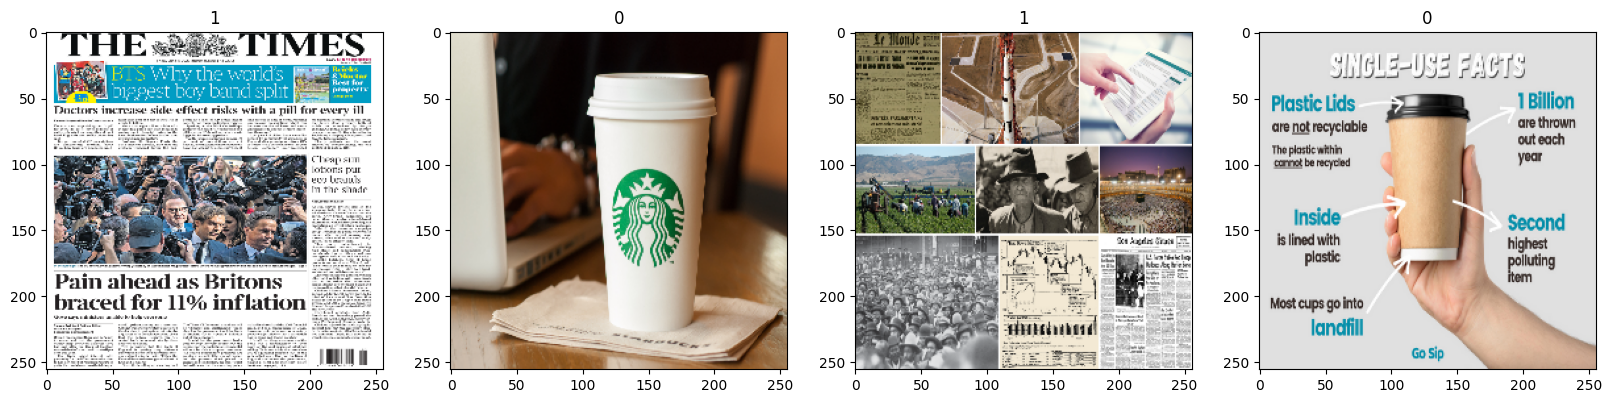

In [266]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [267]:
# Reducing the size of the images as soon as the data reaches the pipeline
# x represents the images
# y represrnts the labels
data = data.map(lambda x,y: (x/255, y))

In [268]:
data.as_numpy_iterator().next()

(array([[[[0.5951114 , 0.5951114 , 0.5951114 ],
          [0.62773436, 0.62773436, 0.62773436],
          [0.5964365 , 0.5964365 , 0.5964365 ],
          ...,
          [0.9400295 , 0.9400295 , 0.9400295 ],
          [0.9299728 , 0.9299728 , 0.9299728 ],
          [0.9150697 , 0.9150697 , 0.9150697 ]],
 
         [[0.4884057 , 0.4884057 , 0.4884057 ],
          [0.5876972 , 0.5876972 , 0.5876972 ],
          [0.60017234, 0.60017234, 0.60017234],
          ...,
          [0.9504347 , 0.9504347 , 0.9504347 ],
          [0.93686616, 0.93686616, 0.93686616],
          [0.9121534 , 0.9121534 , 0.9121534 ]],
 
         [[0.5696366 , 0.5696366 , 0.5696366 ],
          [0.34414446, 0.34414446, 0.34414446],
          [0.4104071 , 0.4104071 , 0.4104071 ],
          ...,
          [0.9452397 , 0.9452397 , 0.9452397 ],
          [0.9367111 , 0.9367111 , 0.9367111 ],
          [0.91603476, 0.91603476, 0.91603476]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [0.85227

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


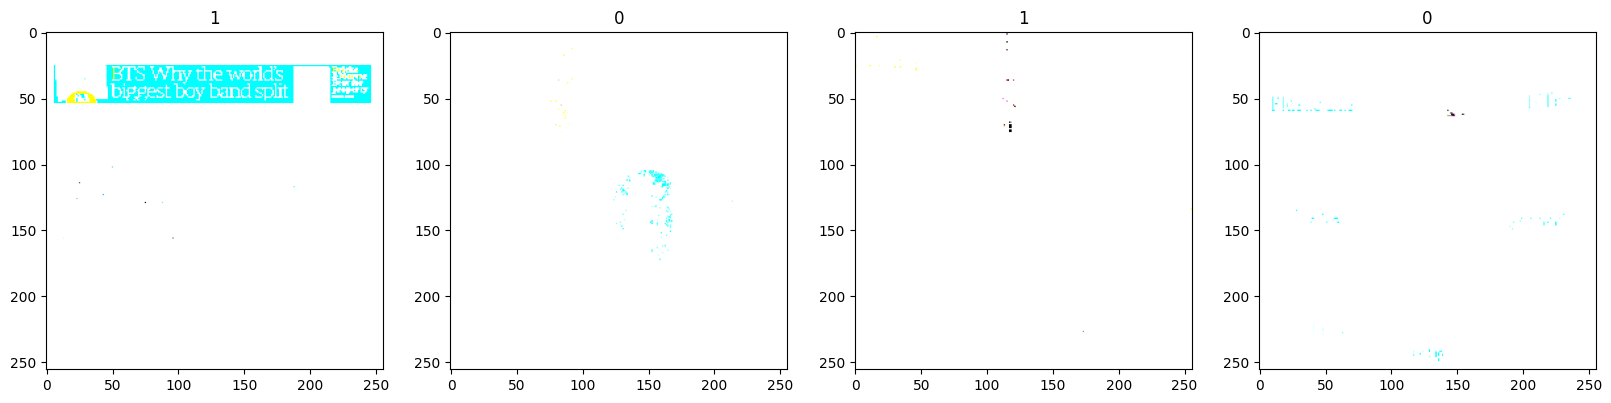

In [269]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [270]:
# training the model (train size = number of batches used to train our model)
train_size = int(len(data)*.7)
# validating the model
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [271]:
train_size

0

In [272]:
# how much data we are taking in that particular partition
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [273]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [274]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [275]:
model = Sequential()

In [276]:
# 16 filters, 3px by 3px in size - the convolution uses these filters to scan out an image and create an output classification
# 1 - the stride, moving 1px at a time
# relu activation - the function to which the output is passed as parameter
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [277]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [278]:
# half of the output from the convolutional network goes to maxpooling
254/2

127.0

In [279]:
# flattening dimension; condensing it down to a single dimension
30*30*16

14400

In [280]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 30, 30, 16)       

# 7. Train

In [281]:
logdir='logs'

In [282]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [283]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


ValueError: Unexpected result of `train_function` (Empty logs). This could be due to issues in input pipeline that resulted in an empty dataset. Otherwise, please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [284]:
hist.history

{'loss': [-185.81842041015625,
  -3435.797607421875,
  -32370.138671875,
  -190328.171875,
  -828867.125,
  -2823377.0,
  -8488076.0,
  -21456150.0,
  -48239888.0,
  -101140384.0,
  -192651712.0,
  -361548384.0,
  -618562304.0,
  -994401408.0,
  -1620949760.0,
  -2557087744.0,
  -3795848960.0,
  -5682075136.0,
  -8145475072.0,
  -11556581376.0],
 'accuracy': [0.02777777798473835,
  0.03125,
  0.02083333395421505,
  0.0347222238779068,
  0.0347222238779068,
  0.03125,
  0.02777777798473835,
  0.03125,
  0.03125,
  0.0347222238779068,
  0.0347222238779068,
  0.03125,
  0.0347222238779068,
  0.03125,
  0.0347222238779068,
  0.0347222238779068,
  0.02777777798473835,
  0.0347222238779068,
  0.0347222238779068,
  0.02777777798473835],
 'val_loss': [-830.6906127929688,
  -8891.8046875,
  -85934.7265625,
  -390900.375,
  -1541762.75,
  -4985679.5,
  -12136578.0,
  -38153012.0,
  -63636920.0,
  -128957736.0,
  -266289216.0,
  -451677568.0,
  -832658432.0,
  -1219354624.0,
  -2205209600.0,
  -3

# 8. Plot Performance

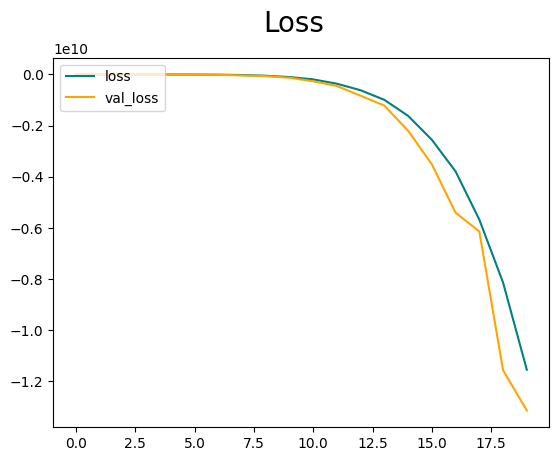

In [285]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

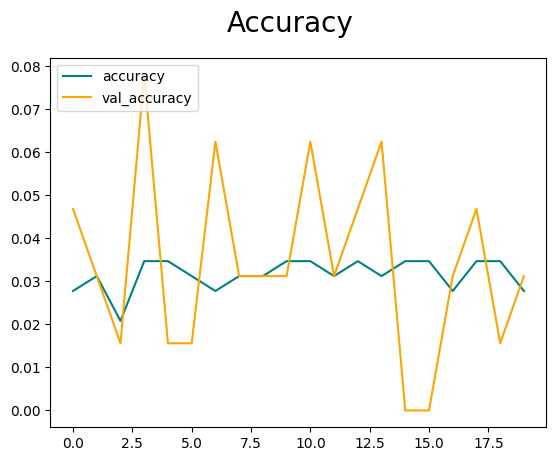

In [286]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [287]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [288]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [289]:
len(test)

0

In [290]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [291]:
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision:0.0, Recall: 0.0, Accuracy: 0.0


# 10. Test

In [292]:
import cv2

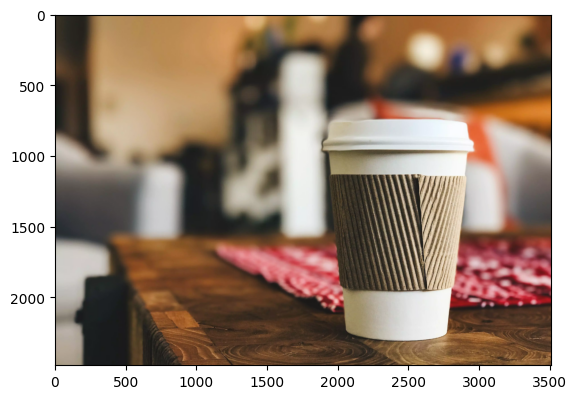

In [293]:
img = cv2.imread('coffee_test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

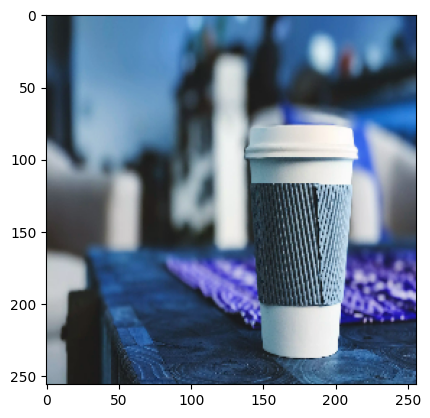

In [294]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [295]:
# testing on a single image and not a batch of data
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [296]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 67ms/step


In [297]:
yhat

array([[0.4693665]], dtype=float32)

In [298]:
if yhat > 0.5: 
    print(f'Predicted class is Newspaper')
else:
    print(f'Predicted class is Coffee Cup')

Predicted class is Coffee Cup


# 11. Save the Model

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('models','imageclassifier.h5'))

In [46]:
new_model = load_model('imageclassifier.h5')

In [47]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)